In [ ]:
C:\Users\VISLAB-seongwon\workspace\2023-NLP\word2vec-nlp-tutorial

In [1]:
DATA_IN_PATH = './word2vec-nlp-tutorial/'

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
print("file size : ")
for file in os.listdir(DATA_IN_PATH):
    #if 'tsv' in file and 'zip' not in file:
    if 'tsv' in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

file size : 
labeledTrainData.tsv          33.56MB
labeledTrainData.tsv.zip      13.59MB
testData.tsv                  32.72MB
testData.tsv.zip              13.26MB
unlabeledTrainData.tsv        67.28MB
unlabeledTrainData.tsv.zip    27.24MB


In [4]:
train_data = pd.read_csv(DATA_IN_PATH + 'labeledTrainData.tsv.zip', header = 0, delimiter = '\t', quoting = 3)
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [5]:
print('전체 학습데이터의 개수 : {}'.format(len(train_data)))

전체 학습데이터의 개수 : 25000


In [6]:
train_length = train_data['review'].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

Text(0, 0.5, 'Number of review')

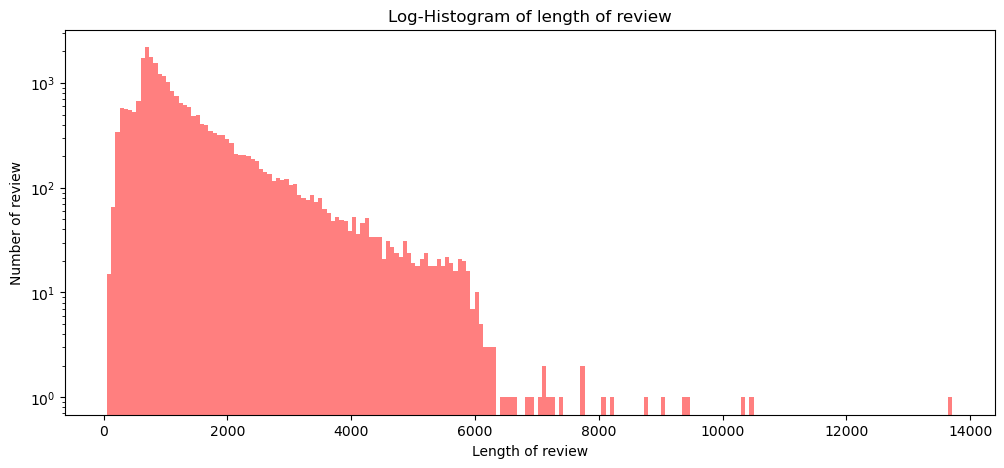

In [7]:
#그래프에 대한 이미지 사이즈 선언
#figsize : (가로, 세로)형태의 튜플로 입력
plt.figure(figsize=(12, 5))
#히스토그램 선언
#bins
#range:
#alpha:
#color:
#label:
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log')
#그래프 제목
plt.title('Log-Histogram of length of review')
#그래프 x축 라벨
plt.xlabel('Length of review')
#그래프 y축 라벨
plt.ylabel('Number of review')

In [8]:
print('리뷰 길이 최대 값 : {}'.format(np.max(train_length)))
print('리뷰 길이 최소 값 : {}'.format(np.min(train_length)))
print('리뷰 길이 평균 값 : {}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차 값 : {}'.format(np.std(train_length)))
print('리뷰 길이 중간 값 : {}'.format(np.median(train_length)))
#사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제 1사분위 : {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제 3사분위 : {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최대 값 : 13710
리뷰 길이 최소 값 : 54
리뷰 길이 평균 값 : 1329.71056
리뷰 길이 표준편차 값 : 1005.2191407969154
리뷰 길이 중간 값 : 983.0
리뷰 길이 제 1사분위 : 705.0
리뷰 길이 제 3사분위 : 1619.0


{'whiskers': [<matplotlib.lines.Line2D at 0x190a75fa100>,
 'caps': [<matplotlib.lines.Line2D at 0x190a75fa640>,
 'boxes': [<matplotlib.lines.Line2D at 0x190a75edf40>],
 'medians': [<matplotlib.lines.Line2D at 0x190a75fab80>],
 'fliers': [<matplotlib.lines.Line2D at 0x190a73e1100>],
 'means': [<matplotlib.lines.Line2D at 0x190a75fae20>]}

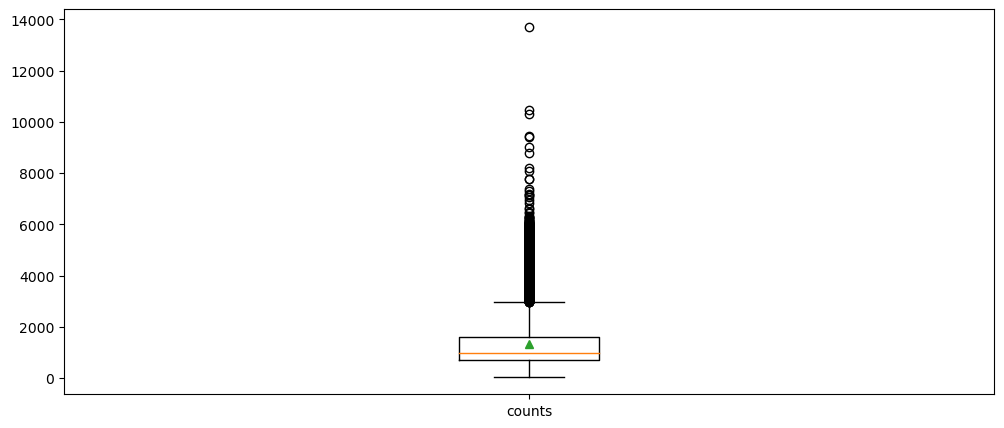

In [9]:
plt.figure(figsize = (12,5))
#박스플롯 생성
#첫번째 파라미터 : 여러 분포에 대한 데이터 리스트를 입력
#레이블 : 입력한 데이터에 대한 라벨
#showmeans : 평균값을 마크함
plt.boxplot(train_length, labels=['counts'], showmeans=True)